In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import geopandas as gpd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
import libpysal as ps
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
georgia_data = pd.read_csv("result.csv")
georgia_shp = gpd.read_file('London_Borough_Excluding_MHW.shp')
g_y = georgia_data['price'].values.reshape((-1,1))
g_X = georgia_data[['income','population', 'Total_Notifiable_Offences','Number_in_employment_(workplace)', 'Claimant_Count']].values
u = georgia_data['long']
v = georgia_data['lat']
g_coords = list(zip(u,v))

g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)

g_y = g_y.reshape((-1,1))

g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [7]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(g_coords, g_y, g_X, gwr_bw).fit()

31.0


In [8]:
georgia_shp['gwr_intercept'] =  np.array(list(gwr_results.params[:,0])+[0])
georgia_shp['gwr_income'] = np.array(list(gwr_results.params[:,1])+[0])
georgia_shp['gwr_population'] = np.array(list(gwr_results.params[:,2])+[0])
georgia_shp['gwr_Offence'] = np.array(list(gwr_results.params[:,3])+[0])
georgia_shp['gwr_emp'] = np.array(list(gwr_results.params[:,4])+[0])
georgia_shp['gwr_Claimant'] = np.array(list(gwr_results.params[:,5])+[0])

gwr_filtered_t = gwr_results.filter_tvals()

In [9]:
cmap = plt.cm.seismic
gwr_min = georgia_shp['gwr_income'].min()
gwr_max = georgia_shp['gwr_income'].max()
vmin = np.min([gwr_min])
vmax = np.max([gwr_max])

In [10]:
from mgwr.utils import shift_colormap, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [71]:
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

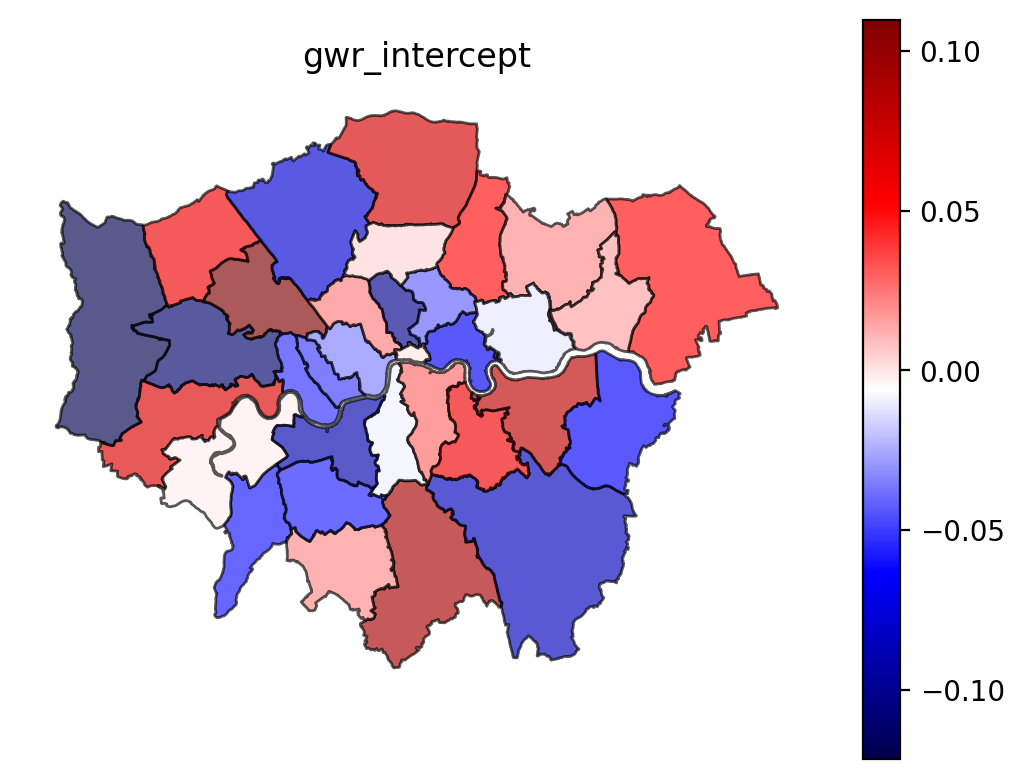

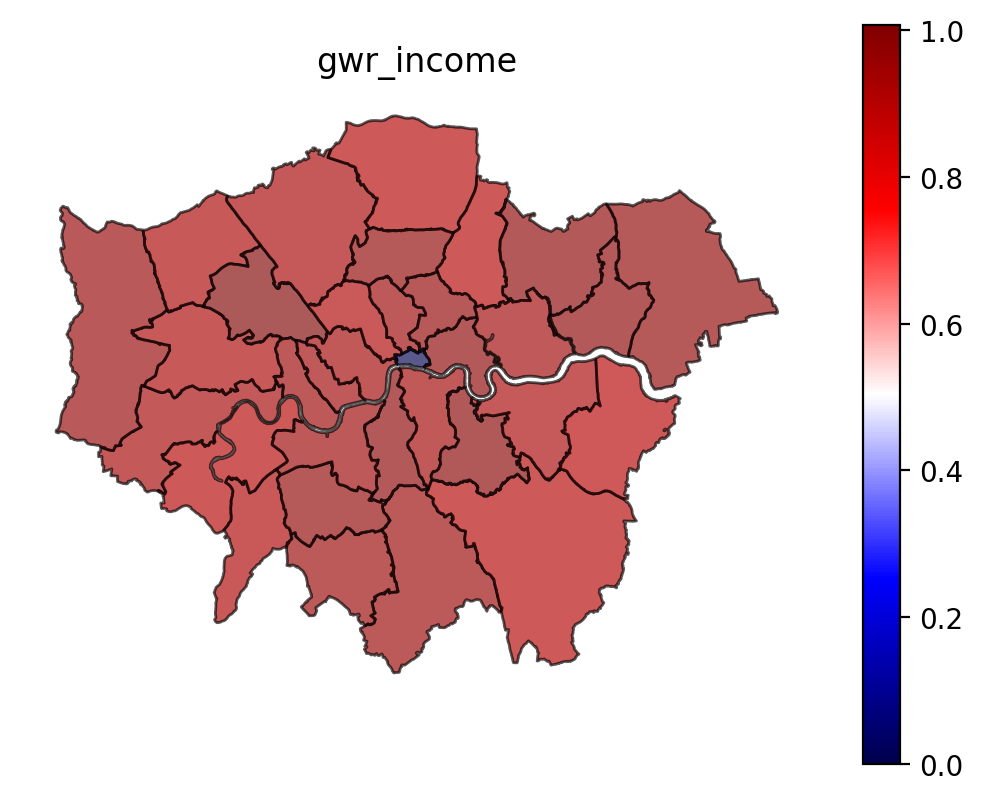

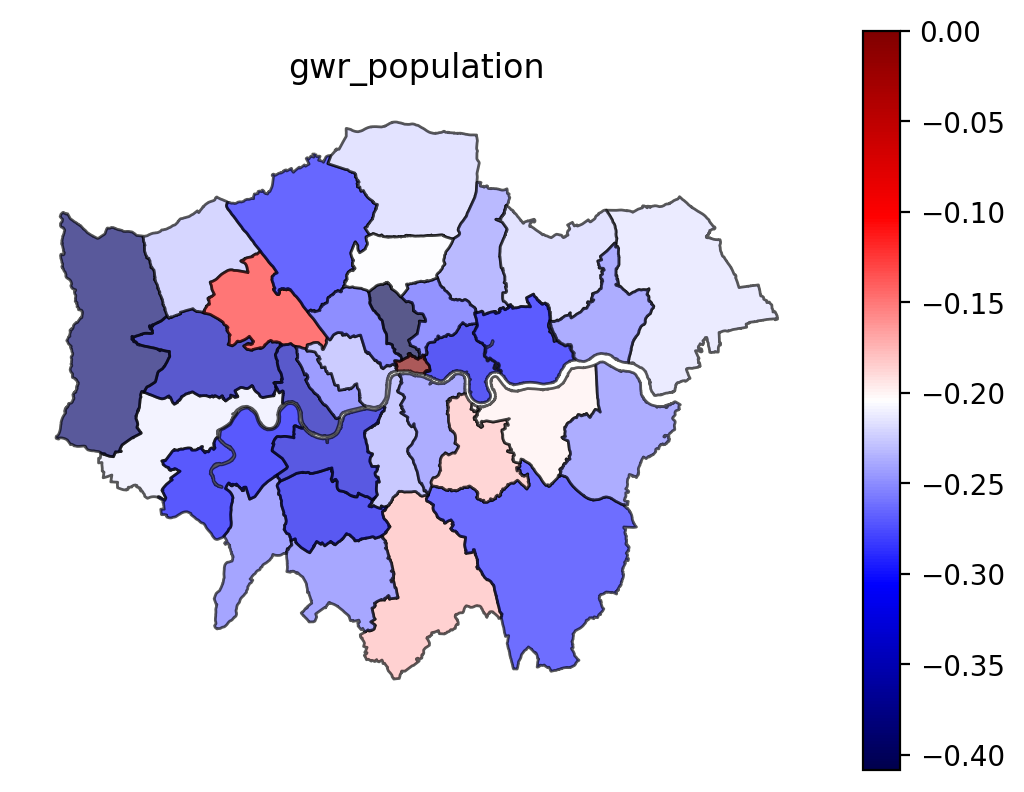

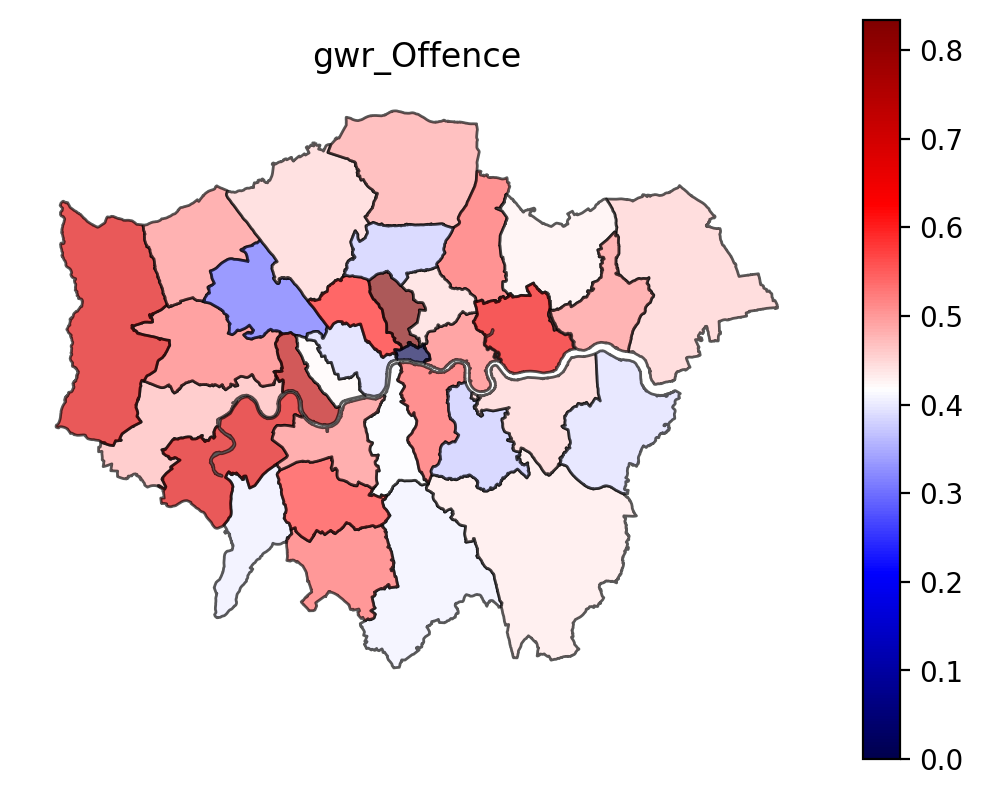

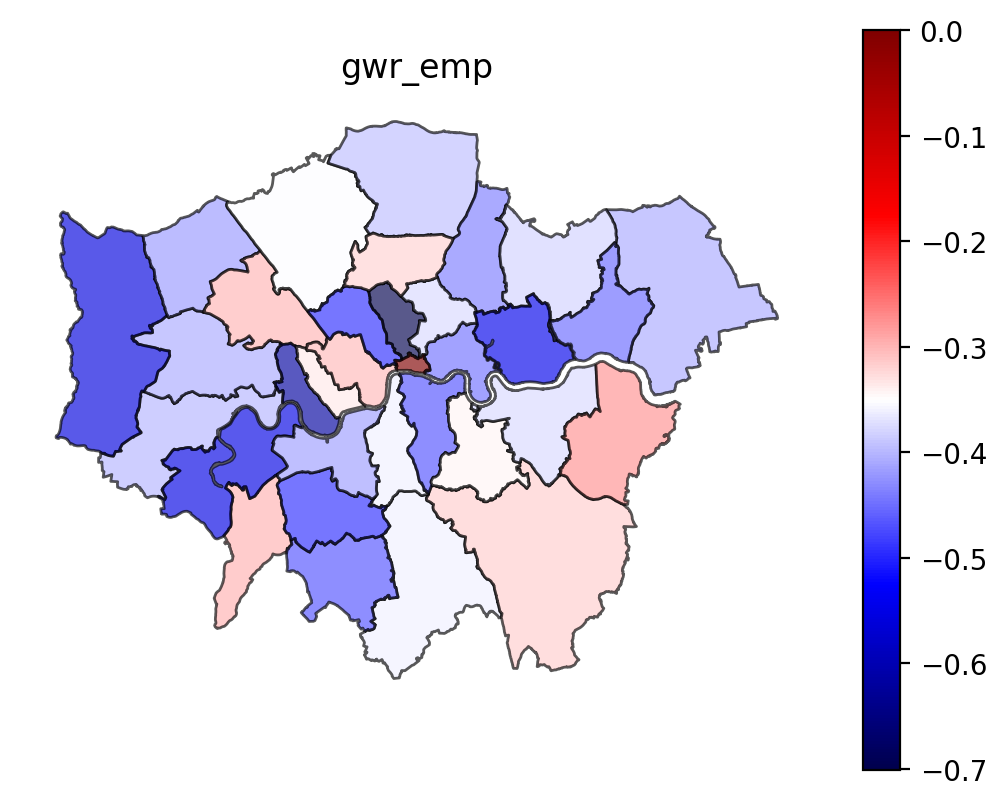

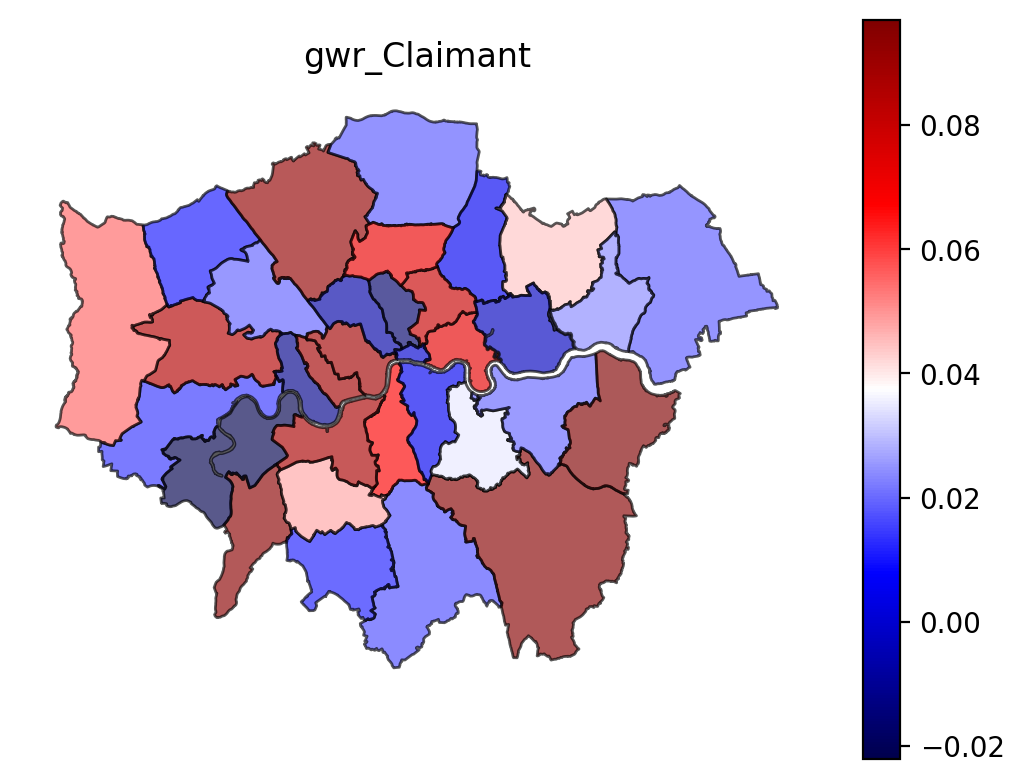

In [13]:
for i in ['gwr_intercept','gwr_income','gwr_population','gwr_Offence','gwr_emp','gwr_Claimant']:
    cmap = plt.cm.seismic
    #Find min and max values of the two combined datasets
    gwr_min = georgia_shp[i].min()
    gwr_max = georgia_shp[i].max()
    vmin = np.min([gwr_min])
    vmax = np.max([gwr_max])

    #Create scalar mappable for colorbar and stretch colormap across range of data values
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

    #Plot GWR parameters
    georgia_shp.plot(i, cmap=sm.cmap,legend = True, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
    plt.axis(False)
    plt.title(i)
    #If there are insignificnt parameters plot gray polygons over them
    # if (gwr_filtered_t[:,0] == 0).any():
    #     georgia_shp[gwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor':'black'})

In [4]:
df = pd.read_csv("result.csv")
df.head()

,Unnamed: 0,area,population,Total_Notifiable_Offences,Number_in_employment_(workplace),Claimant_Count,price,Total_Mean_Annual_Household_Income_estimate,income,long,lat,yhat
0,0,Barking and Dagenham,176155.0,16152.0,46582,127.771166,174987.811435,7.214485e+05,34354.690150,0.129506,51.544767,166540.947946
1,1,Barnet,356386.0,23794.0,118460,119.293656,434901.802500,1.871353e+06,45642.761376,-0.218210,51.615531,420168.766169
2,2,Bexley,225613.0,10965.0,65298,79.399330,218882.067207,1.120742e+06,41508.965282,0.146212,51.458295,261342.751635
3,3,Brent,311215.0,29132.0,101051,183.226974,327362.813295,1.312918e+06,38615.223966,-0.275680,51.558054,237654.403579
4,4,Bromley,287722.0,18685.0,94431,95.045031,326020.321656,1.847927e+06,51331.307087,0.039246,51.371470,379973.743518


In [5]:
df['area'] = df['area'].str.lower()
df.head()

,Unnamed: 0,area,population,Total_Notifiable_Offences,Number_in_employment_(workplace),Claimant_Count,price,Total_Mean_Annual_Household_Income_estimate,income,long,lat,yhat
0,0,barking and dagenham,176155.0,16152.0,46582,127.771166,1.749878e+05,7.214485e+05,34354.690150,0.129506,51.544767,166540.947946
1,1,barnet,356386.0,23794.0,118460,119.293656,4.349018e+05,1.871353e+06,45642.761376,-0.218210,51.615531,420168.766169
2,2,bexley,225613.0,10965.0,65298,79.399330,2.188821e+05,1.120742e+06,41508.965282,0.146212,51.458295,261342.751635
3,3,brent,311215.0,29132.0,101051,183.226974,3.273628e+05,1.312918e+06,38615.223966,-0.275680,51.558054,237654.403579
4,4,bromley,287722.0,18685.0,94431,95.045031,3.260203e+05,1.847927e+06,51331.307087,0.039246,51.371470,379973.743518
5,5,camden,220338.0,33639.0,303988,83.190080,6.836643e+05,1.479574e+06,52841.916980,-0.162890,51.545889,576468.856776
6,6,croydon,355858.0,29402.0,116926,176.828427,2.509378e+05,1.809636e+06,42084.564647,-0.077610,51.354806,251903.109334
7,7,ealing,331738.0,29104.0,120283,145.342581,3.229719e+05,1.692308e+06,44534.433750,-0.314070,51.521970,357376.653868
8,8,enfield,303558.0,20071.0,91157,173.705615,2.832905e+05,1.439138e+06,41118.219003,-0.081470,51.650501,306085.617916
9,9,greenwich,208770.0,15269.0,48917,134.111342,2.386502e+05,1.143804e+06,42363.115532,0.050108,51.472289,281982.962848


In [9]:
london_map = gpd.read_file('London_Borough_Excluding_MHW.shp')
london_map.columns = london_map.columns.str.lower()
london_map.head()

,name,gss_code,hectares,nonld_area,ons_inner,sub_2009,sub_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [11]:
london_map['name'] = london_map['name'].str.lower()
london_map.rename(columns = {'name': 'area'}, inplace = True)
london_map.rename(columns = {'gss_code': 'code'}, inplace = True)

london_map = london_map[['area', 'code', 'hectares', 'geometry']]
london_map.head()

,area,code,hectares,geometry
0,kingston upon thames,E09000021,3726.117,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,croydon,E09000008,8649.441,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,bromley,E09000006,15013.487,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,hounslow,E09000018,5658.541,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,ealing,E09000009,5554.428,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [12]:
lnd_m = df[['area', 'population', 'Total_Notifiable_Offences',
       'Number_in_employment_(workplace)', 'Claimant_Count', 'price',
       'Total_Mean_Annual_Household_Income_estimate', 'income']]
lnd_m_map = pd.merge(london_map, lnd_m, how = 'inner', on = ['area'])
lnd_m_map.head()

,area,code,hectares,geometry,population,Total_Notifiable_Offences,Number_in_employment_(workplace),Claimant_Count,price,Total_Mean_Annual_Household_Income_estimate,income
0,kingston upon thames,E09000021,3726.117,"POLYGON ((516401.600 160201.800, 516407.300 16...",160060.0,10372.0,71794,32.442388,386534.316408,1.019425e+06,50971.241801
1,croydon,E09000008,8649.441,"POLYGON ((535009.200 159504.700, 535005.500 15...",355858.0,29402.0,116926,176.828427,250937.750789,1.809636e+06,42084.564647
2,bromley,E09000006,15013.487,"POLYGON ((540373.600 157530.400, 540361.200 15...",287722.0,18685.0,94431,95.045031,326020.321656,1.847927e+06,51331.307087
3,hounslow,E09000018,5658.541,"POLYGON ((521975.800 178100.000, 521967.700 17...",245564.0,22041.0,111472,84.264229,300594.595181,1.115439e+06,41312.563040
4,ealing,E09000009,5554.428,"POLYGON ((510253.500 182881.600, 510249.900 18...",331738.0,29104.0,120283,145.342581,322971.926296,1.692308e+06,44534.433750


In [14]:
lnd_m_map['population'] = lnd_m_map['population']/10

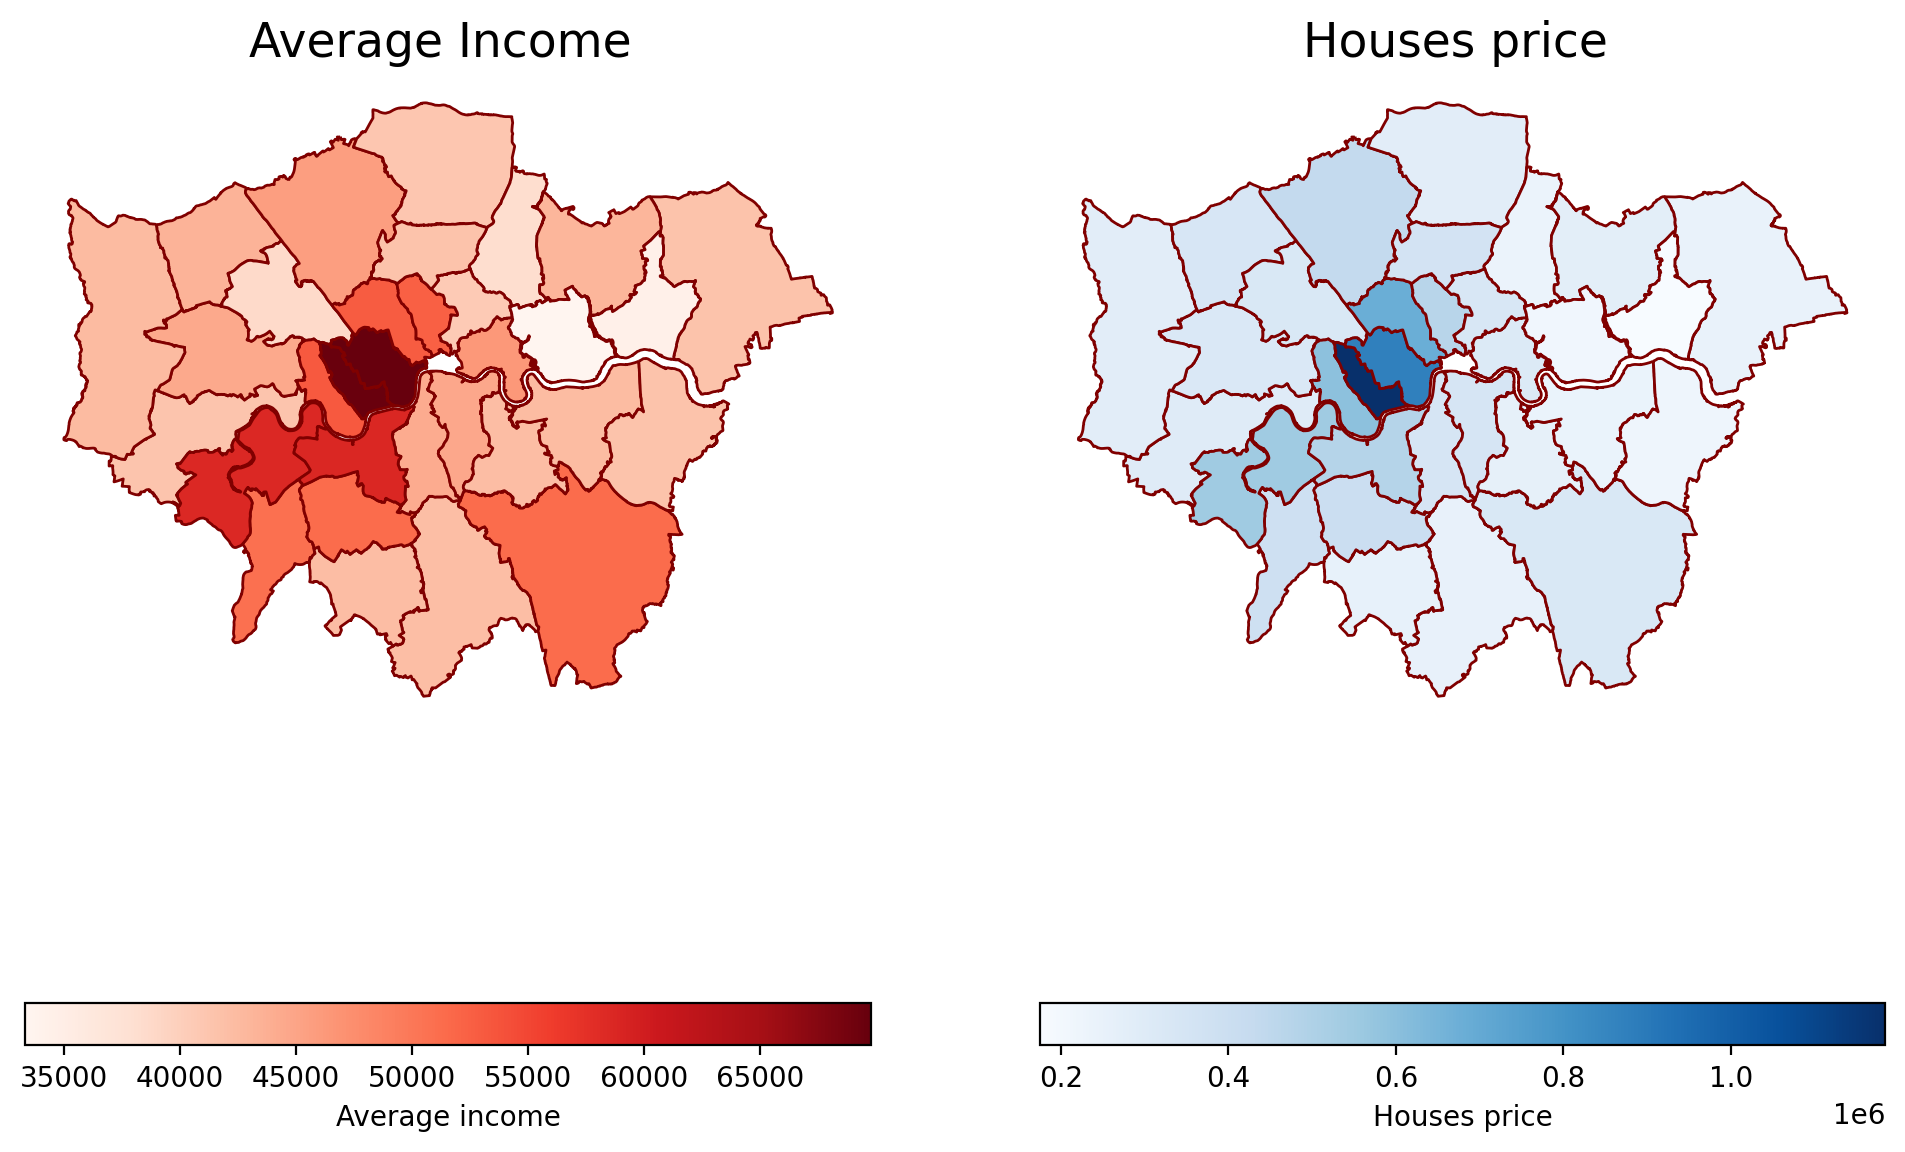

In [15]:
font_size=17
fig, ax = plt.subplots(1, 2, figsize = (12, 12))

lnd_m_map.plot(ax = ax[0], column = 'income', cmap = 'Reds', edgecolor = 'maroon', legend = True, legend_kwds = {'label': 'Average income', 'orientation' : 'horizontal'})
lnd_m_map.plot(ax = ax[1], column = 'price', cmap = 'Blues', edgecolor = 'maroon', legend = True, legend_kwds = {'label': 'Houses price', 'orientation' : 'horizontal'})
ax[0].axis('off')
ax[0].set_title('Average Income ', size = font_size)
ax[1].axis('off')
ax[1].set_title('Houses price ', size = font_size);

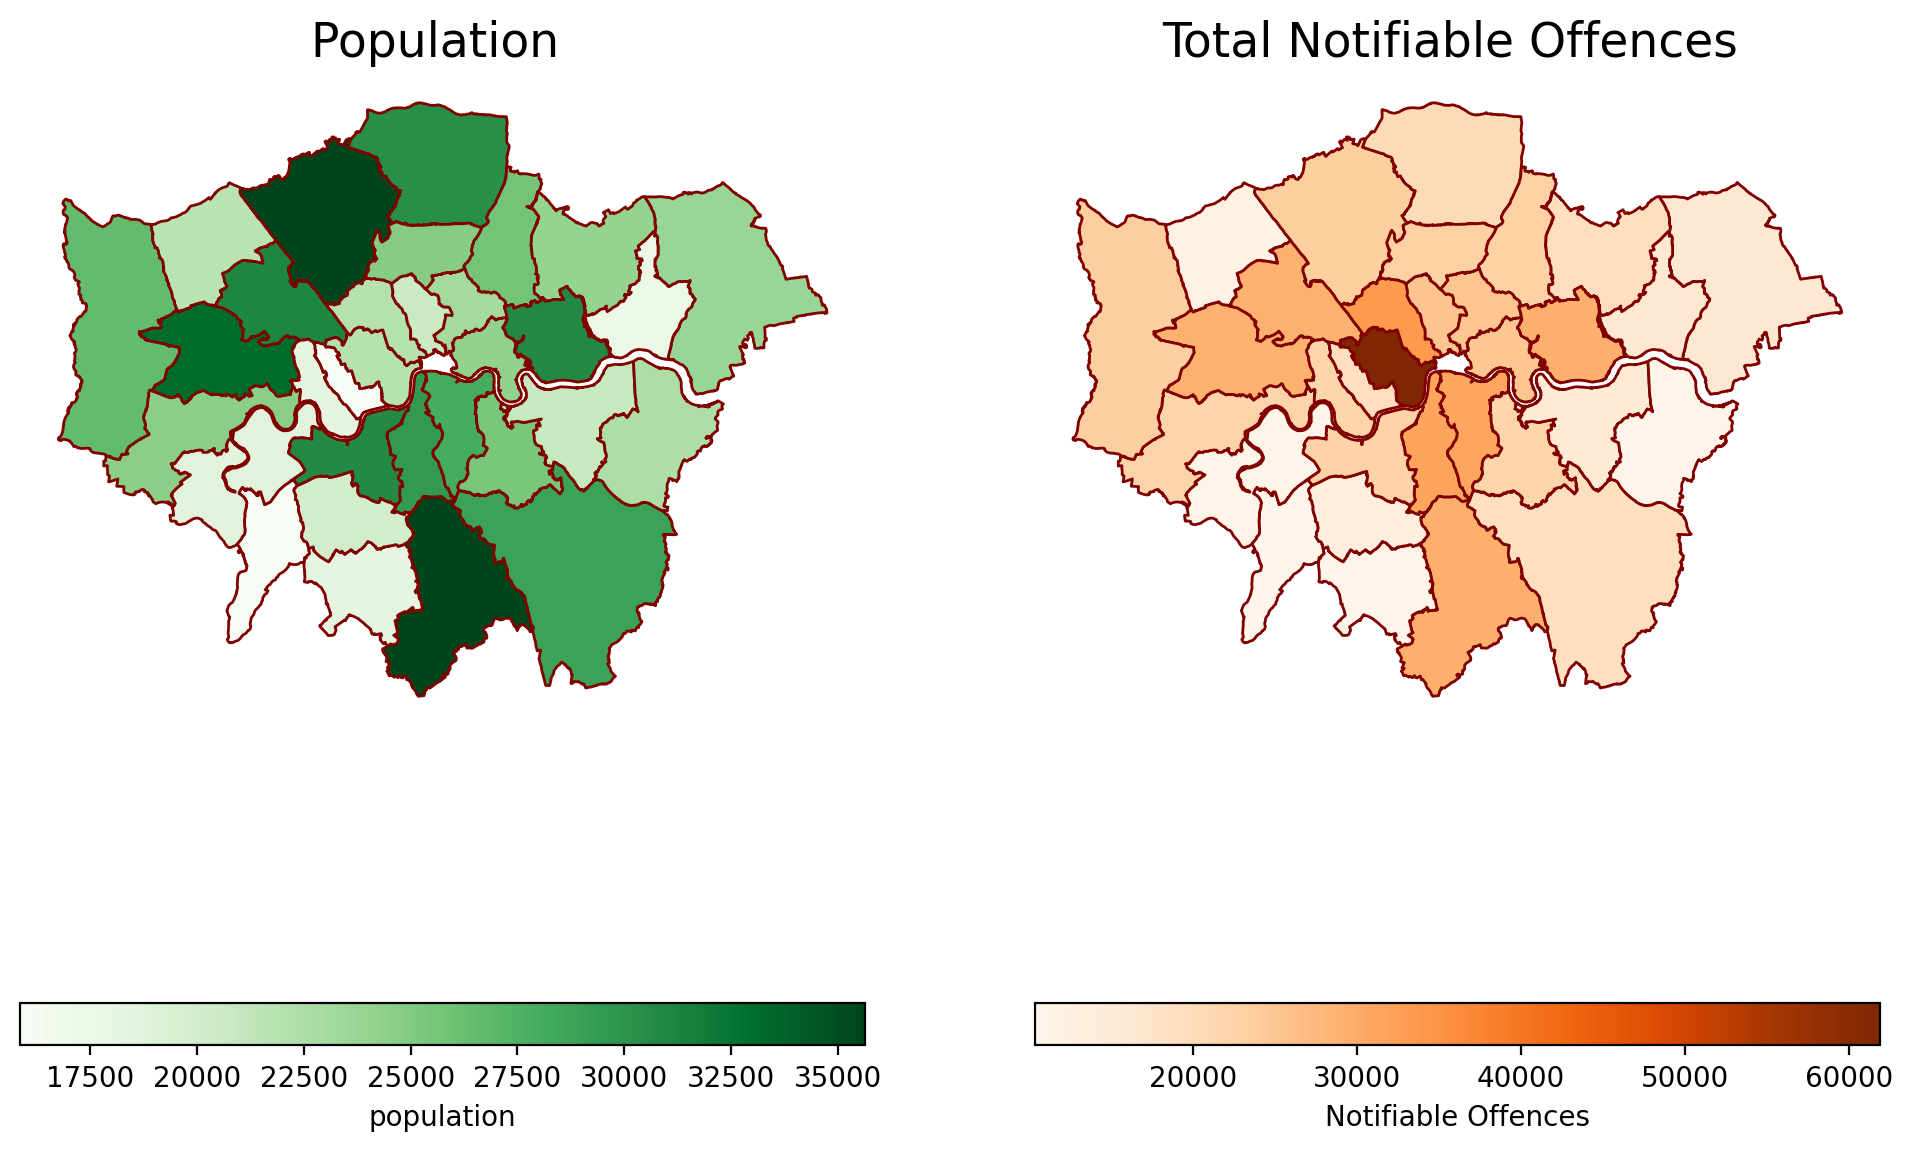

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (12, 12))

lnd_m_map.plot(ax = ax[0], column = 'population', cmap = 'Greens', edgecolor = 'maroon', legend = True, legend_kwds = {'label': 'population', 'orientation' : 'horizontal'})
lnd_m_map.plot(ax = ax[1], column = 'Total_Notifiable_Offences', cmap = 'Oranges', edgecolor = 'maroon', legend = True, legend_kwds = {'label': 'Notifiable Offences', 'orientation' : 'horizontal'})
ax[0].set_title('Population ', size = font_size)
ax[1].axis('off')
ax[1].set_title('Total Notifiable Offences ', size = font_size);

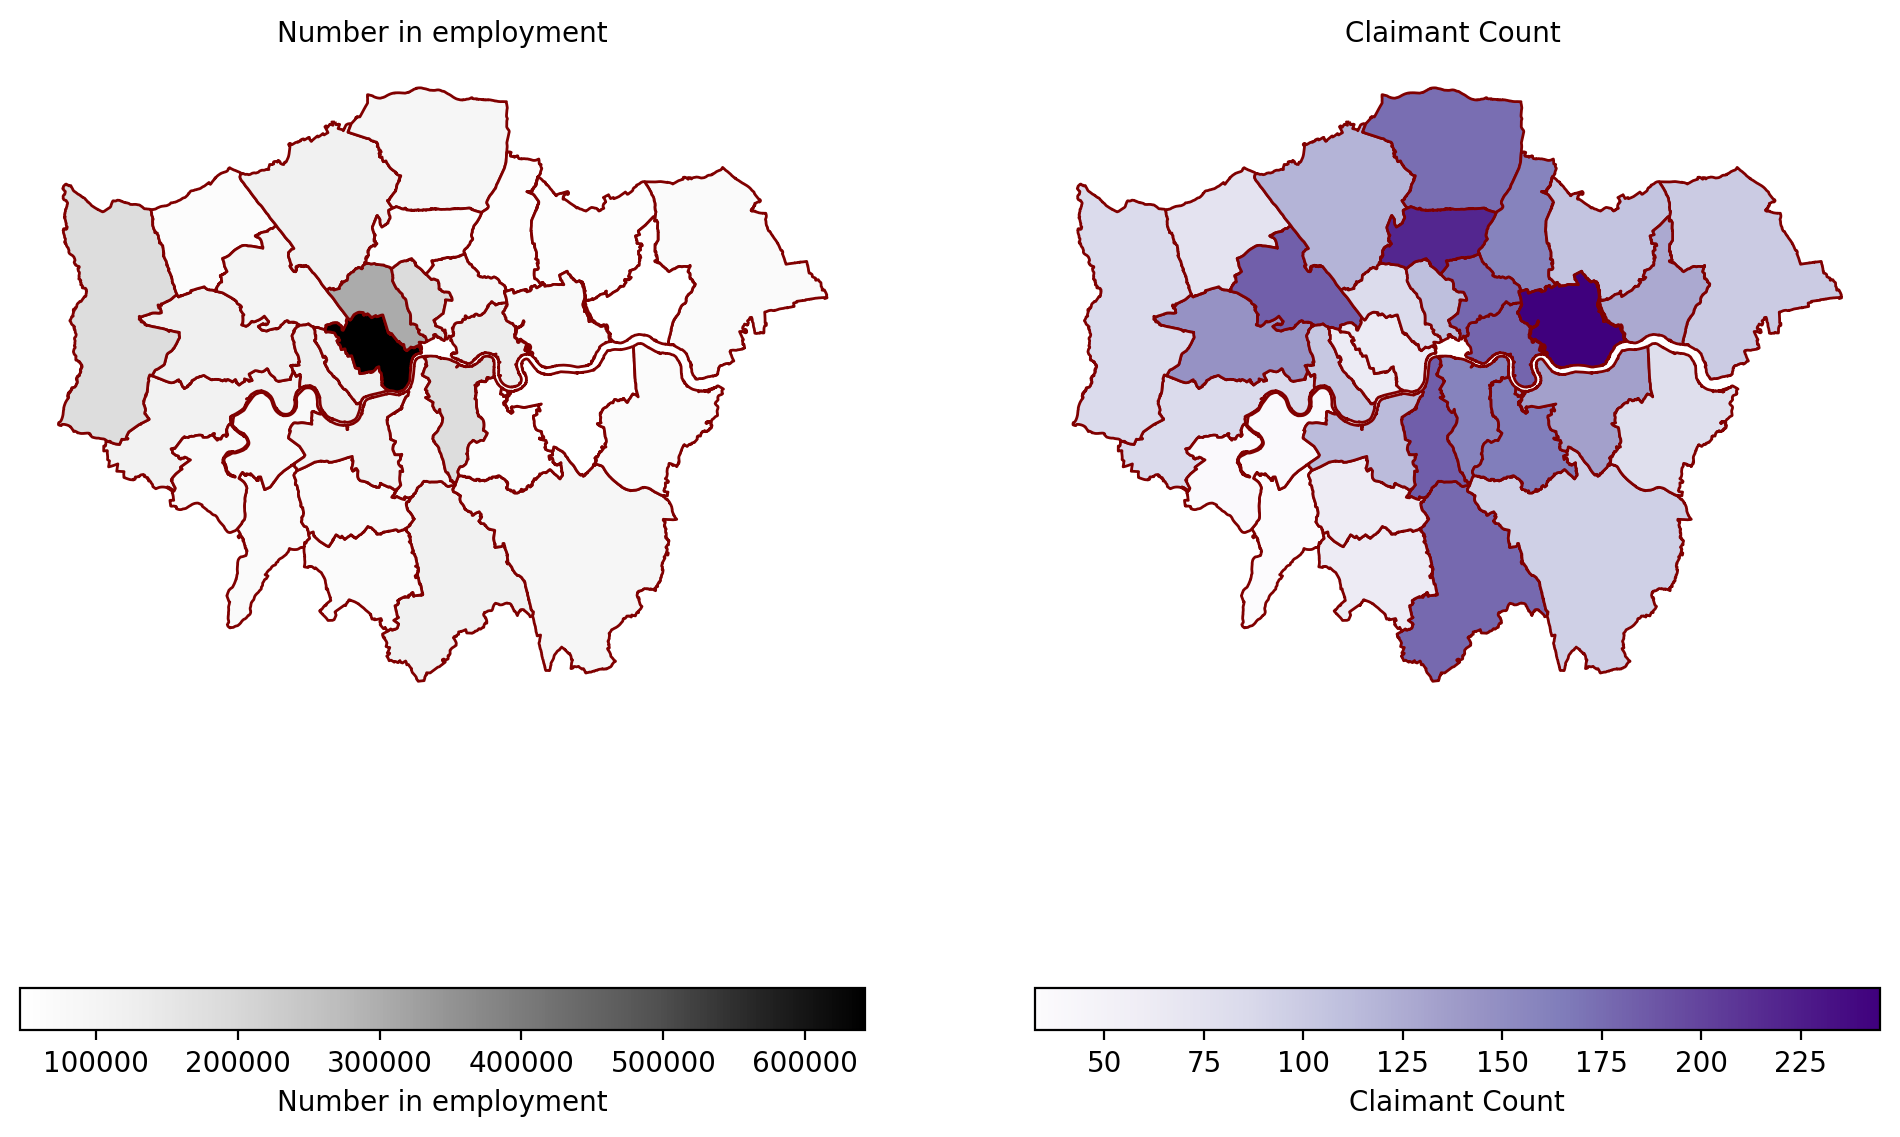

In [17]:
font_size = 10
fig, ax = plt.subplots(1, 2, figsize = (12, 12))

lnd_m_map.plot(ax = ax[0], column = 'Number_in_employment_(workplace)', cmap = 'Greys', edgecolor = 'maroon', legend = True, legend_kwds = {'label': 'Number in employment', 'orientation' : 'horizontal'})
lnd_m_map.plot(ax = ax[1], column = 'Claimant_Count', cmap = 'Purples', edgecolor = 'maroon', legend = True, legend_kwds = {'label': 'Claimant Count', 'orientation' : 'horizontal'})

ax[0].axis('off')
ax[0].set_title('Number in employment', size = font_size)
ax[1].axis('off')
ax[1].set_title('Claimant Count ', size = font_size);